In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apartments-in-almaty/almaty_apartments_with_id.csv


## Importing all dependencies

In [3]:
# importing all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

## Loading CSV file into DataFrame

In [4]:
# loading CSV file into DataFrame
almaty_house_data = pd.read_csv('/kaggle/input/apartments-in-almaty/almaty_apartments_with_id.csv')

## Data Analysis

In [5]:
# number of rows and cols in the dataset
almaty_house_data.shape

(11883, 9)

In [6]:
# displaying the first five rows of the dataset
almaty_house_data.head()

,Id,number_of_rooms,district,structure_type,year_of_construction,floor,area,quality,price
0,1,4.0,5,3,1971.0,5.0,75.0,3,43000000.0
1,2,1.0,3,3,2016.0,1.0,21.0,3,9000000.0
2,3,1.0,1,2,2014.0,1.0,20.0,3,20000000.0
3,4,1.0,0,1,2023.0,3.0,45.0,4,20000000.0
4,5,2.0,3,3,1977.0,5.0,51.7,1,36100000.0


In [7]:
# details of each 9 features
almaty_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11883 entries, 0 to 11882
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    11883 non-null  int64  
 1   number_of_rooms       11883 non-null  float64
 2   district              11883 non-null  int64  
 3   structure_type        11883 non-null  int64  
 4   year_of_construction  11883 non-null  float64
 5   floor                 11883 non-null  float64
 6   area                  11883 non-null  float64
 7   quality               11883 non-null  int64  
 8   price                 11883 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 835.7 KB


In [8]:
# checking missing values
almaty_house_data.isnull().sum()

Id                      0
number_of_rooms         0
district                0
structure_type          0
year_of_construction    0
floor                   0
area                    0
quality                 0
price                   0
dtype: int64

In [9]:
# statistical measure of the data
almaty_house_data.describe()

,Id,number_of_rooms,district,structure_type,year_of_construction,floor,area,quality,price
count,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,1.188300e+04
mean,5942.000000,2.242279,3.067996,2.071952,2001.005638,5.127746,67.909524,2.770176,5.574516e+07
std,3430.470959,1.005266,1.942687,0.667965,20.735878,4.108691,42.911796,0.847650,5.075142e+08
min,1.000000,1.000000,0.000000,0.000000,1932.000000,1.000000,8.000000,0.000000,3.500000e+06
25%,2971.500000,1.000000,2.000000,2.000000,1982.000000,2.000000,44.000000,3.000000,2.790000e+07
50%,5942.000000,2.000000,3.000000,2.000000,2011.000000,4.000000,59.400000,3.000000,3.800000e+07
75%,8912.500000,3.000000,5.000000,3.000000,2019.000000,7.000000,76.300000,3.000000,5.500000e+07
max,11883.000000,12.000000,7.000000,3.000000,2025.000000,186.000000,850.000000,4.000000,5.500000e+10


In [10]:
almaty_house_data['district'].unique()

array([5, 3, 1, 0, 2, 7, 6, 4])

District is a categorical col. so we need to use one-hot encode for this feature.

In [11]:
almaty_house_data['structure_type'].unique()

array([3, 2, 1, 0])

Structure_type is a categorical col. so we need to use one-hot encode for this feature.

<details> <summary><strong> Feature Analysis Summary

| Feature               | Description & Range                             | Type               | Encoding Needed? | Notes |
|------------------------|--------------------------------------------------|--------------------|------------------|-------|
| `Id`                  | 1 to 11883 (unique IDs)                         | Identifier         | ❌ Drop it        | ✅ Just an identifier |
| `number_of_rooms`     | 1 to 12 (mean ≈ 2.24)                           | Discrete numeric   | ❌ No             | Room count – leave as is |
| `district`            | 0 to 7 (mean ≈ 3.07, std ≈ 1.94)                | **Categorical**    | ✅ Yes (One-hot)  | District code – one-hot encode |
| `structure_type`      | 0 to 3 (mean ≈ 2.07)                            | **Categorical**    | ✅ Yes (One-hot)  | Building structure type – one-hot encode |
| `year_of_construction`| 1932 to 2025 (mean ≈ 2001)                      | Continuous numeric | ❌ No             | Keep as-is (or normalize) |
| `floor`               | 1 to 186 (!!)                                   | Continuous numeric | ❌ No             | Consider capping extreme outliers |
| `area`                | 8 to 850 (m²)                                   | Continuous numeric | ❌ No             | Consider log-transform for skew |
| `quality`             | 0 to 4 (mean ≈ 2.77)                            | **Ordinal**        | ❌ Maybe          | If 0–4 means poor → premium, keep as is |
| `price`               | Target: 3.5M to 55 **billion** (!?)             | Continuous target  | ❌ No             | Consider log-transform due to skew |</strong></summary>



In [12]:
# drop ID col. as it just an identifier
almaty_house_data = almaty_house_data.drop(columns='Id', axis=1)

## Concerns

1. Outliers:
   - floor: max = 186 → seems an outlier (normal homes < 20 floors)
   - area: max = 850 m² → Very large property
   - price: up to 55 billion KZT, while 75% of prices are ≤ 55 million → heavy right skew
2. Skewed Target Variable
3. Encodind needed for categorical cols. --> district, structure_type

### 1. Removing Outliers

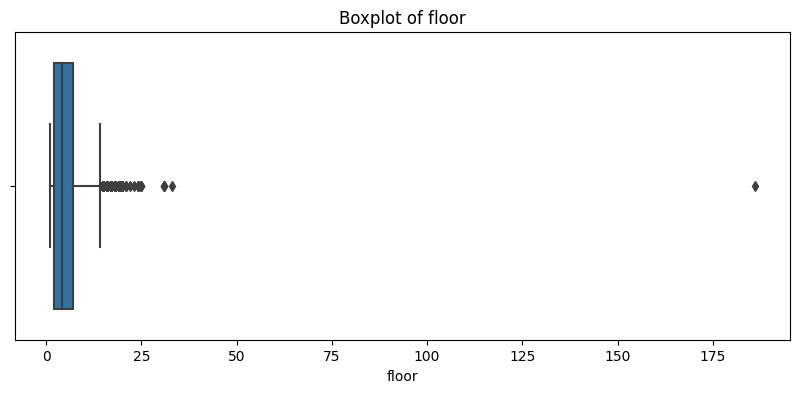

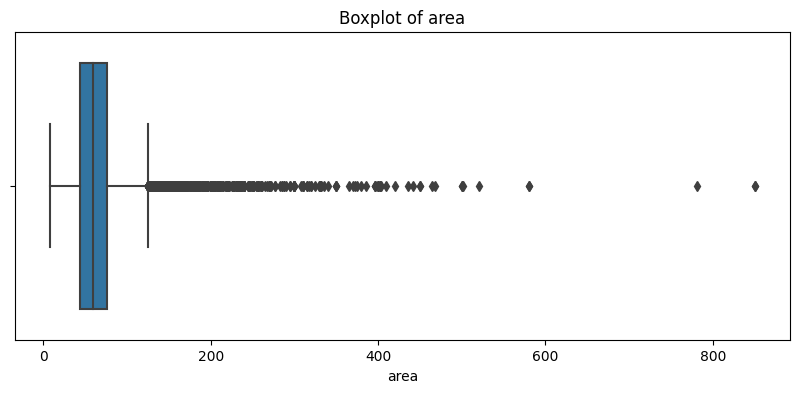

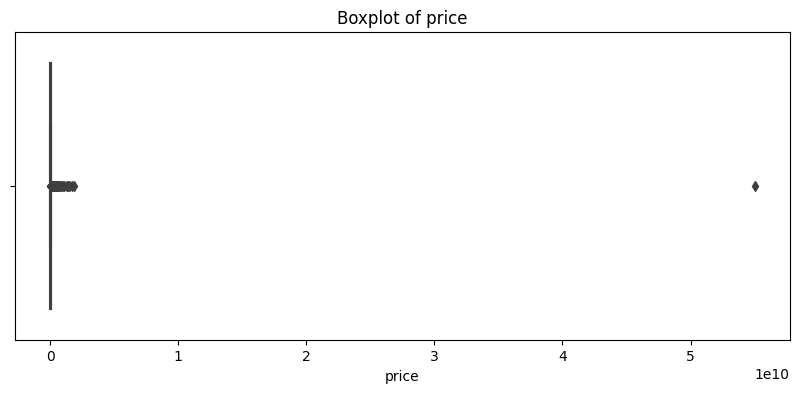

In [13]:
#  boxplots floor, area, price
numerical_cols = ['floor', 'area', 'price']

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=almaty_house_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers")
        
    return df

# Apply the function to your dataset
filtered_data = remove_outliers_iqr(almaty_house_data, ['floor', 'area', 'price'])

# Check new shape
print("New dataset shape:", filtered_data.shape)

floor: Removed 367 outliers
area: Removed 767 outliers
price: Removed 582 outliers
New dataset shape: (10167, 8)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


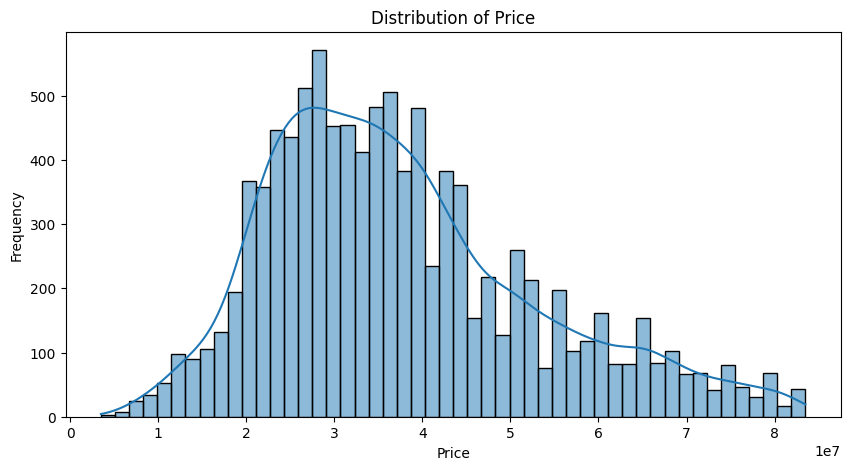

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data['price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The distribution of Price is still rightly skewed. So we will be using log transformation to target price column.

### 2. Applying log transformation for better model fit

In [16]:
# log transoformation --> price
filtered_data['log_price'] = np.log1p(filtered_data['price'])  # log(1 + price)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


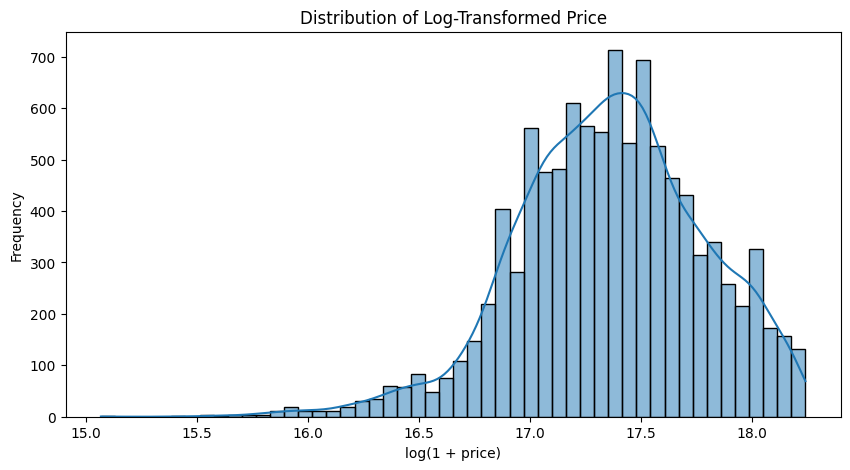

Skewness after log transform: -0.3781419161916234


In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data['log_price'], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Price")
plt.xlabel("log(1 + price)")
plt.ylabel("Frequency")
plt.show()

print("Skewness after log transform:", filtered_data['log_price'].skew())

price col. is approximately normal distribution now after log tranform

### 3. Applying One-hot encoding for categorical cols.

In [18]:
filtered_data.head()

,number_of_rooms,district,structure_type,year_of_construction,floor,area,quality,price,log_price
0,4.0,5,3,1971.0,5.0,75.0,3,43000000.0,17.576711
1,1.0,3,3,2016.0,1.0,21.0,3,9000000.0,16.012735
2,1.0,1,2,2014.0,1.0,20.0,3,20000000.0,16.811243
3,1.0,0,1,2023.0,3.0,45.0,4,20000000.0,16.811243
4,2.0,3,3,1977.0,5.0,51.7,1,36100000.0,17.401803


In [19]:
filtered_data = filtered_data.drop(columns='price', axis=1)

In [20]:
# one-hot encoding --> 'district' & 'structure_type'
filtered_data = pd.get_dummies(filtered_data, columns=['district', 'structure_type'], drop_first=True)

In [21]:
filtered_data.head()

,number_of_rooms,year_of_construction,floor,area,quality,log_price,district_1,district_2,district_3,district_4,district_5,district_6,district_7,structure_type_1,structure_type_2,structure_type_3
0,4.0,1971.0,5.0,75.0,3,17.576711,False,False,False,False,True,False,False,False,False,True
1,1.0,2016.0,1.0,21.0,3,16.012735,False,False,True,False,False,False,False,False,False,True
2,1.0,2014.0,1.0,20.0,3,16.811243,True,False,False,False,False,False,False,False,True,False
3,1.0,2023.0,3.0,45.0,4,16.811243,False,False,False,False,False,False,False,True,False,False
4,2.0,1977.0,5.0,51.7,1,17.401803,False,False,True,False,False,False,False,False,False,True


## Separating the target and features

In [22]:
# Separating the target variable price from the rest of the features for prediction
X = filtered_data.drop(columns='log_price', axis=1)
y = filtered_data['log_price']

## Applying StandardScaler to numeric columns

In [23]:
filtered_data['quality'].unique()

array([3, 4, 1, 2, 0])

Quality column is ordinal category i.e. ordered quality levels.


Values represent:
0: very poor
1: poor
2: average
3: good
4: excellent

Even though it's categorical, it's ordinal in nature, so the distance between levels (e.g., 2 to 3) can hold meaning.
Thus, standardizing it along with other numeric features like area, floor, etc. helps models handle scale differences better.

In [25]:
# Since values in each column are in different ranges, it is required to standardized them.

# Separate numeric and categorical columns
num_cols = ['number_of_rooms', 'year_of_construction', 'floor', 'area', 'quality']
#cat_cols = [col for col in X.columns if col not in num_cols]

scaler = StandardScaler() # Creating scaler object
X_scaled_num = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index)

# Keeping categorical (one-hot encoded) columns as-is
X_cat = X.drop(columns=num_cols)  # these are your dummy variables

# Combining scaled numeric + categorical
X_final = pd.concat([X_scaled_num, X_cat], axis=1)

In [27]:
X_final

,number_of_rooms,year_of_construction,floor,area,quality,district_1,district_2,district_3,district_4,district_5,district_6,district_7,structure_type_1,structure_type_2,structure_type_3
0,2.330302,-1.310326,0.121600,0.948649,0.288444,False,False,False,False,True,False,False,False,False,True
1,-1.256162,0.802115,-1.189432,-1.827913,0.288444,False,False,True,False,False,False,False,False,False,True
2,-1.256162,0.708229,-1.189432,-1.879331,0.288444,True,False,False,False,False,False,False,False,True,False
3,-1.256162,1.130717,-0.533916,-0.593885,1.468092,False,False,False,False,False,False,False,True,False,False
4,-0.060674,-1.028668,0.121600,-0.249386,-2.070854,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11877,-0.060674,-1.028668,-0.206158,-0.727572,0.288444,True,False,False,False,False,False,False,False,False,True
11878,-0.060674,0.849058,-0.533916,0.434471,0.288444,False,False,False,False,False,False,True,False,True,False
11879,-1.256162,-1.169497,-1.189432,-1.072071,0.288444,False,False,True,False,False,False,False,True,False,False
11881,-0.060674,0.802115,0.449357,-0.131125,0.288444,False,False,True,False,False,False,False,False,True,False


In [29]:
# checking of missing values after all the preprocessing
X_final.isnull().sum()

number_of_rooms         0
year_of_construction    0
floor                   0
area                    0
quality                 0
district_1              0
district_2              0
district_3              0
district_4              0
district_5              0
district_6              0
district_7              0
structure_type_1        0
structure_type_2        0
structure_type_3        0
dtype: int64

## Splitting train and test data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=2)

In [33]:
print(X_final.shape, X_train.shape, X_test.shape)

(10167, 15) (8133, 15) (2034, 15)


## Model Training and Evaluation

In [34]:
# Since the target variable is price, a continuous numeric value, this is a regression problem. 
# using these 3 models --> LinearRegression, RandomForestRegressor and GradientBoostingRegressor
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=42)
model3 = GradientBoostingRegressor(random_state=42)

In [37]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(model)
    print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
    print("Train R² :", r2_score(y_train, y_pred_train))
    print("Test MAE :", mean_absolute_error(y_test, y_pred_test))
    print("Test R²  :", r2_score(y_test, y_pred_test))

In [38]:
evaluate_model(model1, X_train, y_train, X_test, y_test)
evaluate_model(model2, X_train, y_train, X_test, y_test)
evaluate_model(model3, X_train, y_train, X_test, y_test)

LinearRegression()
Train MAE: 0.15347974678438947
Train R² : 0.7528317643610487
Test MAE : 0.1539049261798246
Test R²  : 0.757249065487613
RandomForestRegressor(random_state=42)
Train MAE: 0.04388208939476019
Train R² : 0.9774693748181713
Test MAE : 0.11448459569389567
Test R²  : 0.8497834076400488
GradientBoostingRegressor(random_state=42)
Train MAE: 0.12157838618803493
Train R² : 0.8497897172690618
Test MAE : 0.1239618003018914
Test R²  : 0.8399203202914647


## Model Performance Summary

| Model                   | Train R² | Test R² | Train MAE | Test MAE | Notes                             |
|------------------------|----------|---------|-----------|----------|-----------------------------------|
| Linear Regression       | 0.75     | 0.76    | 0.153     | 0.154    | Simple, no overfitting            |
| Random Forest Regressor | 0.98     | 0.85    | 0.044     | 0.114    | Best accuracy, slight overfit     |
| Gradient Boosting       | 0.85     | 0.84    | 0.122     | 0.124    | Best trade-off, robust performer  |


### Recommendation
GradientBoostingRegressor() --> Best generalization + robustness